<a href="https://colab.research.google.com/github/akshaypat444/tensorflow_practice/blob/main/02_Neural_Networks_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

1. Docstring Shortcut - Shift + Cmd + Space

## Input Shape for Images Classification

1. Batch Size (32 is very common batch size)
2. Width
3. Height
4. Color Channels

## Activation function

1. For binary classification - Sigmoid
2. For multiclass classfication - SoftMax
3. Usually in dense layers - ReLU

## Loss Function

1. Binary CrossEntropy
2. Multiclass CrossEntropy

## Create Data for Binary classification 1/0

In [ ]:
## Create 1000 examples
n_samples = 1000


# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)


In [ ]:
circles = pd.DataFrame({"X0": X[:, 0], "X1":X[:, 1], "label": y })
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


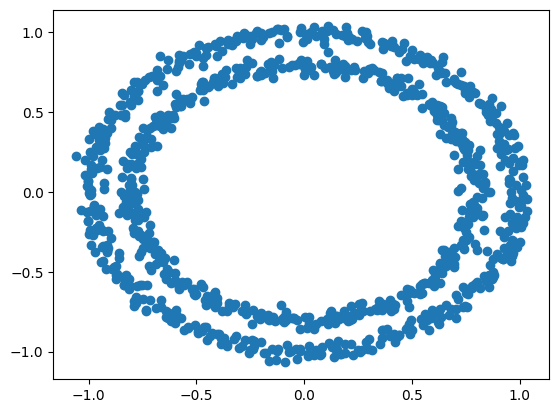

In [ ]:
plt.scatter(X[:, 0], X[:, 1])

## Input and Output Shapes

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Model 1



In [ ]:
tf.random.set_seed(42)


# Create a Model
circle_classification_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
circle_classification_model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                                    optimizer=tf.keras.optimizers.SGD(),
                                    metrics="accuracy")

# Fit the model
circle_classification_model_1.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 2.6825 - accuracy: 0.4730
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7508 - accuracy: 0.4940
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7121 - accuracy: 0.4930
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6999 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6958 - accuracy: 0.4990
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.4870
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.5100
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4810
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4800
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4940
Epoch 11/

In [ ]:
circle_classification_model_1.evaluate(X, y)

32/32 [==============================] - 1s 4ms/step - loss: 0.6932 - accuracy: 0.5000


[0.693244993686676, 0.5]

## Model 2

Trying to make model a bit more complex by adding extra hidden layer since it's accuracy is only 50%

In [ ]:
tf.random.set_seed(42)


# Create a Model
circle_classification_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Compile the model
circle_classification_model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                                    optimizer=tf.keras.optimizers.SGD(),
                                    metrics="accuracy")

# Fit the model
circle_classification_model_2.fit(X, y, epochs=100, verbose=0)

In [ ]:
circle_classification_model_2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6932642459869385, 0.5]

## Model 3 - Improvement

Common ways to improve the model

1. Adding more hidden layers
2. Increase the number of hidden units
3. Change the activation function
4. Change the optimzation function
5. Change the learning rate
6. Fitting on more data
7. Fitting for longer

In [ ]:
tf.random.set_seed(42)


# Create a Model
circle_classification_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
circle_classification_model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                                    optimizer=tf.keras.optimizers.Adam(),
                                    metrics="accuracy")

# Fit the model
circle_classification_model_3.fit(X, y, epochs=100, verbose=0)

In [ ]:
circle_classification_model_3.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6977 - accuracy: 0.5160


[0.6976504921913147, 0.515999972820282]

### Accuracy is still the same even with 2 hidden units and more neurons added with Adam optimizer. Model isn't learning at all. What's happening? ###

In [ ]:
y_preds = circle_classification_model_3.predict(X)

32/32 [==============================] - 0s 951us/step


In [ ]:
def plot_decision_boundary(model, X, y):
  """ Plot decision boundary created by model predicting on X
  """
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  x_in = np.c_[xx.ravel(), yy.ravel()]

  y_pred = model.predict(x_in)

  if len(y_pred[0]) > 1:
    print("Doing multiclass classification")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)

  else:
    print("Doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.xlim(yy.min(), yy.max())


313/313 [==============================] - 0s 1ms/step
Doing binary classification


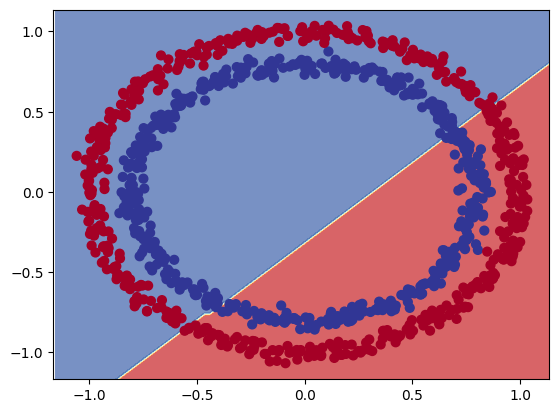

In [ ]:
plot_decision_boundary(model=circle_classification_model_3, X=X, y=y)

In [ ]:
tf.random.set_seed(42)

X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)

X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]

y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

circle_classification_model_3.fit(X_reg_train, y_reg_train, epochs=100)

Epoch 1/100


ValueError: ignored

## Binary classfication model will not work for regression problem.

In [ ]:
tf.random.set_seed(42)


# Create a Model
circle_classification_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(1,)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
circle_classification_model_4.compile(loss=tf.keras.losses.mae,
                                    optimizer=tf.keras.optimizers.Adam(),
                                    metrics="mae")

# Fit the model on regression data
circle_classification_model_4.fit(X_reg_train, y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: 605.4415 - mae: 605.4415
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 498.3667 - mae: 498.3667
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 397.1725 - mae: 397.1725
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 293.5068 - mae: 293.5068
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 186.0408 - mae: 186.0408
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 73.0812 - mae: 73.0812
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 71.2532 - mae: 71.2532
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 86.1021 - mae: 86.1021
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 62.5960 - mae: 62.5960
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 46.8307 - mae: 46.8307
Epoch 11/100
5/5 [==============================]

In [ ]:
circle_classification_model_4.evaluate(X_reg_test, y_reg_test)

2/2 [==============================] - 0s 6ms/step - loss: 60.4264 - mae: 60.4264


[60.426368713378906, 60.426368713378906]

In [ ]:
y_reg_preds = circle_classification_model_4.predict(X_reg_test)

2/2 [==============================] - 0s 3ms/step


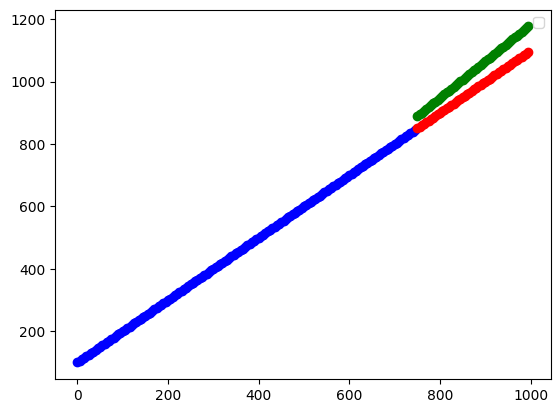

In [ ]:
plt.scatter(X_reg_train, y_reg_train, c="b")
plt.scatter(X_reg_test, y_reg_test, c="r")
plt.scatter(X_reg_test, y_reg_preds, c="g")
plt.legend();

In [ ]:
tf.random.set_seed(42)

# Create a Model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="linear")
])

# Compile the model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# Fit the model
history_model_4 = model_4.fit(X, y, epochs=100, verbose=0)

In [ ]:
model_4.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.7050 - accuracy: 0.4720


[0.70504230260849, 0.47200000286102295]

313/313 [==============================] - 0s 1ms/step
Doing binary classification


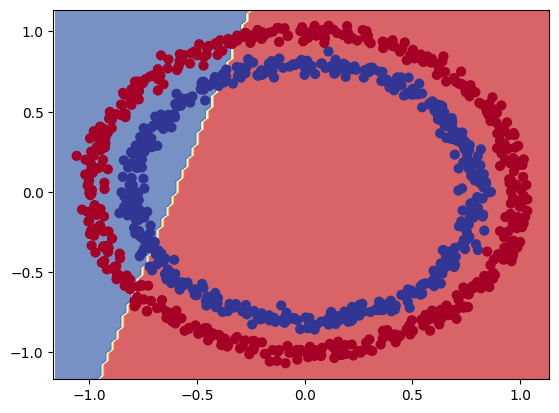

In [ ]:
plot_decision_boundary(model_4, X, y)

## Model 5 - Introducing Non-Linearity

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create model
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="relu"),
])

# Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
                metrics=["accuracy"])

# Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

In [ ]:
model_5.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

313/313 [==============================] - 0s 932us/step
Doing binary classification


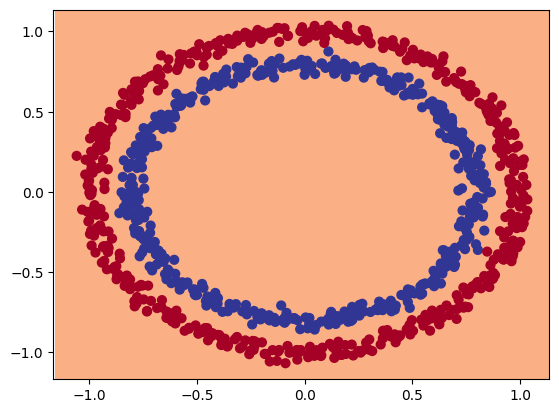

In [ ]:
plot_decision_boundary(model_5, X, y)

## Model 6

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create model
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# Fit the model
history = model_6.fit(X, y, epochs=200)

Epoch 1/200
32/32 [==============================] - 1s 1ms/step - loss: 0.6884 - accuracy: 0.5270
Epoch 2/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6813 - accuracy: 0.5390
Epoch 3/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6737 - accuracy: 0.5270
Epoch 4/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6668 - accuracy: 0.5700
Epoch 5/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6556 - accuracy: 0.6040
Epoch 6/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6403 - accuracy: 0.6320
Epoch 7/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6259 - accuracy: 0.6640
Epoch 8/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6093 - accuracy: 0.6680
Epoch 9/200
32/32 [==============================] - 0s 1ms/step - loss: 0.5870 - accuracy: 0.7040
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 0.5276 - accuracy: 0.7640
Epoch 11/

In [ ]:
model_6.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0127 - accuracy: 0.9960


[0.012664145790040493, 0.9959999918937683]

313/313 [==============================] - 0s 958us/step
Doing binary classification


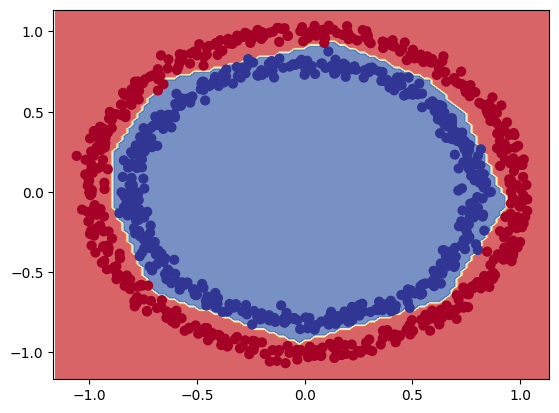

In [ ]:
plot_decision_boundary(model_6, X, y)

## This model gave 99% accuracy and decision boundry fits perfectly. But we don't have the actual testing data for evaluating the model.

In [ ]:
print("DONE")

DONE


In [ ]:
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

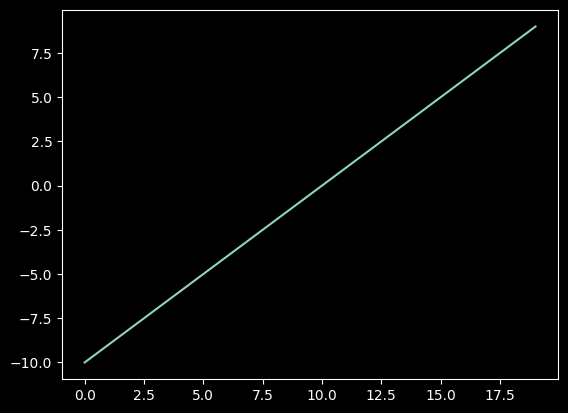

In [ ]:
# Visualize our toy tensor
plt.style.use('dark_background')
plt.plot(A)

## Sigmoid activation function

In [ ]:
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

In [ ]:
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

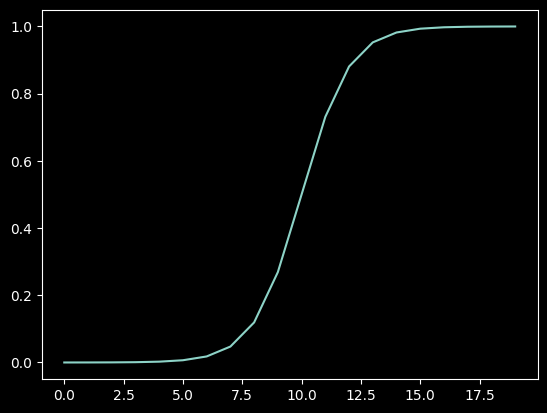

In [ ]:
plt.plot(sigmoid(A))

## Relu activation function

In [ ]:
def relu(x):
 return tf.maximum(0, x)

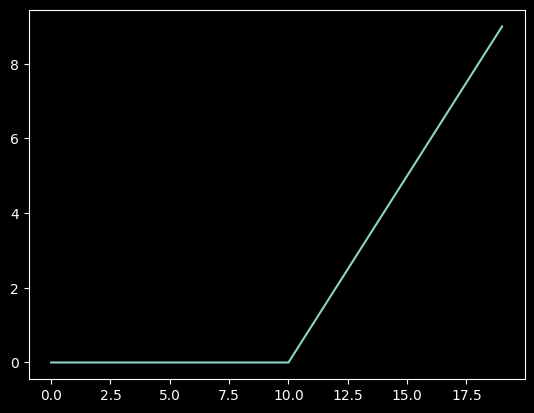

In [ ]:
plt.plot(relu(A))

In [ ]:
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

## Model 7 - Evaluating and improving classification model using test data

In [ ]:
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

In [ ]:
tf.random.set_seed(42)

# Create a model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

history = model_7.fit(X_train, y_train, epochs=50)

Epoch 1/50
25/25 [==============================] - 1s 1ms/step - loss: 0.6897 - accuracy: 0.5000
Epoch 2/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6838 - accuracy: 0.5700
Epoch 3/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6797 - accuracy: 0.5387
Epoch 4/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6735 - accuracy: 0.5587
Epoch 5/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6649 - accuracy: 0.6413
Epoch 6/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6544 - accuracy: 0.5775
Epoch 7/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6365 - accuracy: 0.6438
Epoch 8/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6121 - accuracy: 0.6988
Epoch 9/50
25/25 [==============================] - 0s 2ms/step - loss: 0.5914 - accuracy: 0.6975
Epoch 10/50
25/25 [==============================] - 0s 1ms/step - loss: 0.5574 - accuracy: 0.7400
Epoch 11/50
25/25 [

In [ ]:
model_7.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0934 - accuracy: 0.9850


[0.09336508065462112, 0.9850000143051147]

313/313 [==============================] - 1s 2ms/step
Doing binary classification
313/313 [==============================] - 1s 2ms/step
Doing binary classification


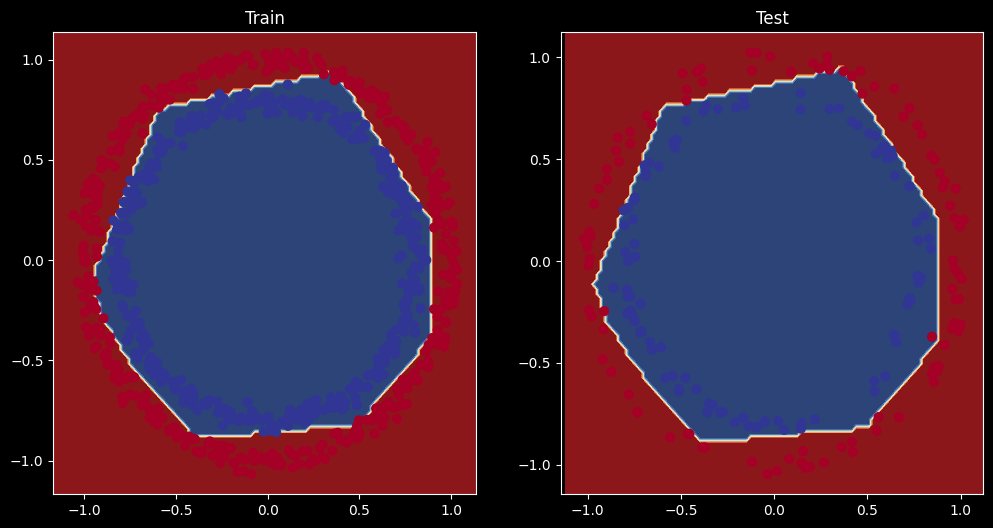

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_7, X_train, y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_7, X_test, y_test)

## Plot the model learning graph

Text(0.5, 0, 'epochs')

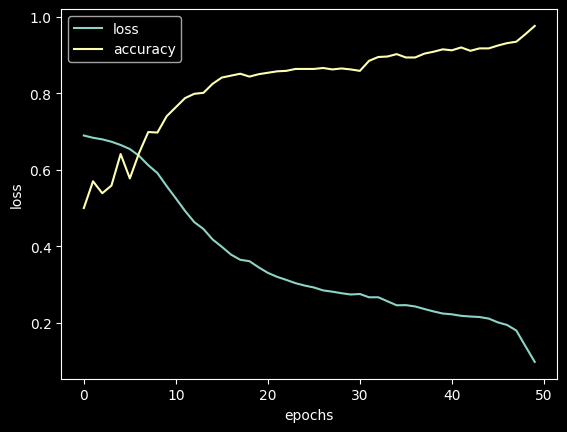

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## Model 8 - Finding the best learning rate -> Learning rate callback

In [ ]:
tf.random.set_seed(42)

# Create the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Create learning rate callback
lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model
history_9 = model_8.fit(X_train, y_train, epochs=100, callbacks=[lr_schedular])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6927 - accuracy: 0.4888 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.4913 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.5013 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6923 - accuracy: 0.5100 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6921 - accuracy: 0.5075 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6919 - accuracy: 0.5100 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6916 - accuracy: 0.5050 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5100 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss:

Text(0.5, 0, 'epochs')

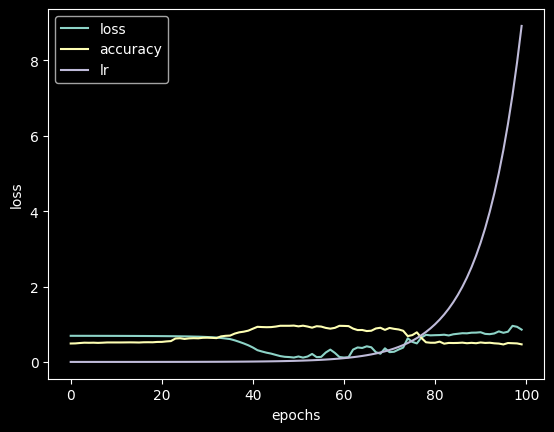

In [ ]:
pd.DataFrame(history_9.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## Ideal learning rates -> 1, 0.1, 0.01, 0.001, 0.0001

In [ ]:
tf.random.set_seed(42)

# Create the model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.04),
                metrics=["accuracy"])



# Fit the model
history_10 = model_9.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 4ms/step - loss: 0.6913 - accuracy: 0.5275
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6712 - accuracy: 0.5925
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6236 - accuracy: 0.6600
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5478 - accuracy: 0.7412
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4659 - accuracy: 0.8138
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3562 - accuracy: 0.9038
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.2596 - accuracy: 0.9550
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.2044 - accuracy: 0.9638
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.1556 - accuracy: 0.9737
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.1223 - accuracy: 0.9862
Epoch 11/

In [ ]:
model_9.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0816 - accuracy: 0.9750


[0.08160827308893204, 0.9750000238418579]

313/313 [==============================] - 0s 1ms/step
Doing binary classification
313/313 [==============================] - 0s 1ms/step
Doing binary classification


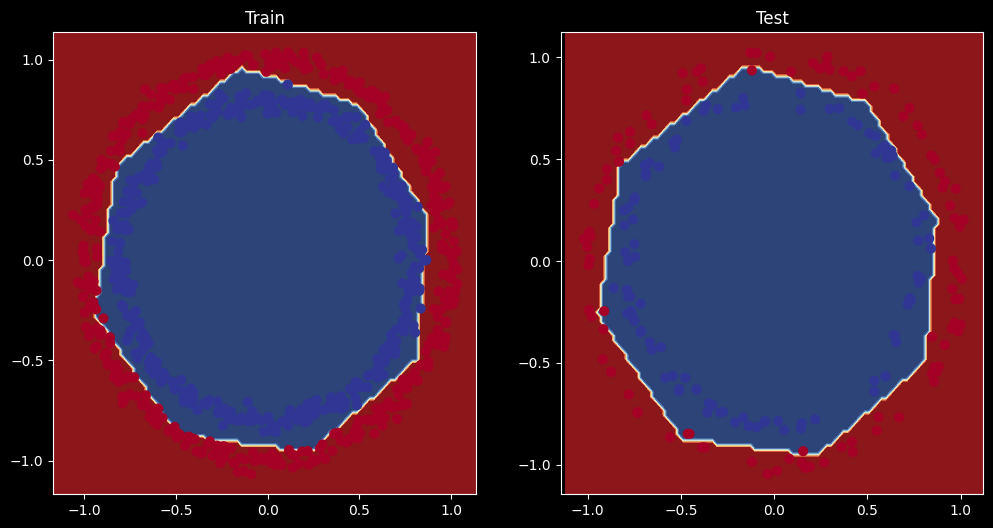

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_9, X_train, y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_9, X_test, y_test)

## More classification evaluation methods
1. Accuracy is not good metric for imbalanced data
2. Precision
3. Recall
4. F1 score
5. Confusion Matrix
6. Classification report

In [ ]:
# Check the accuracy of our Model
loss, accuracy = model_9.evaluate(X_test, y_test)
loss, accuracy*100

7/7 [==============================] - 0s 2ms/step - loss: 0.0816 - accuracy: 0.9750


(0.08160827308893204, 97.50000238418579)

In [63]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_9.predict(X_test)

# Create confusion_matrix
confusion_matrix(y_test, tf.round(y_preds))

7/7 [==============================] - 0s 3ms/step


array([[96,  5],
       [ 0, 99]])

## Visualize confusion matrix

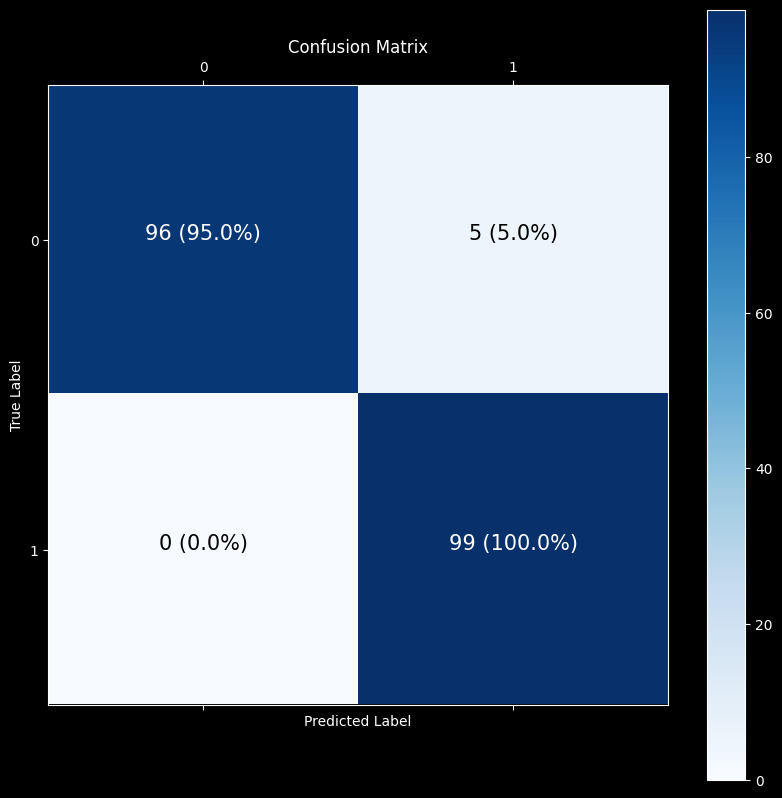

In [69]:
import itertools

figsize = (10,10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
   labels = np.arange(cm.shape[0])

ax.set(title="Confusion Matrix", xlabel="Predicted Label", ylabel="True Label",
      xticks=np.arange(n_classes), yticks=np.arange(n_classes),
       xticklabels=labels, yticklabels=labels)

threshold = (cm.max() + cm.min()) / 2


for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i,j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

# Multiclass Classification
* Classifying clothing items - fashion_mnist

In [72]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [73]:
(train_data.shape, train_labels.shape), (test_data.shape, test_labels.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

In [74]:
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [78]:
train_labels[0]

9

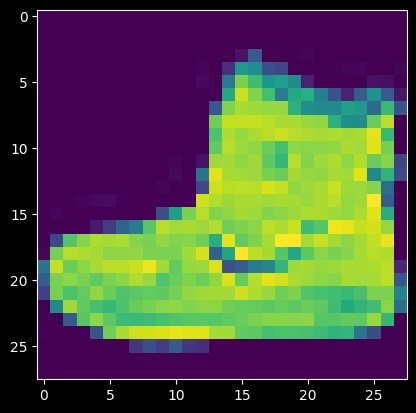

In [83]:
plt.imshow(train_data[0])

In [92]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

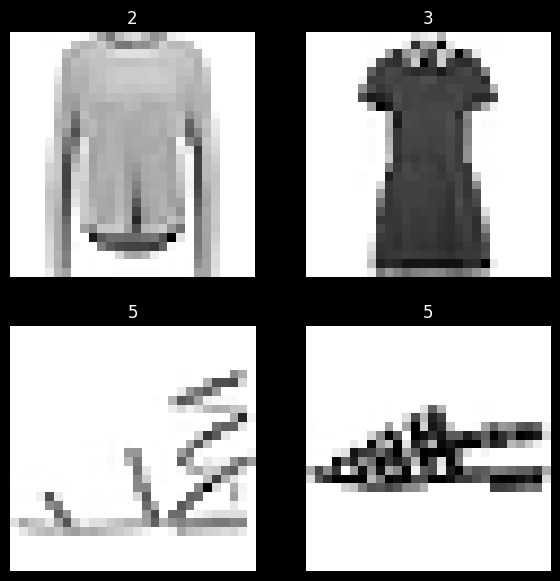

In [94]:
# Plot multiple random images of fashion mnist
import random

plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2,2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(train_labels[rand_index])
  plt.axis(False)

## Mnist Model 1 - Multiclass classification

1. input_shape = 28 * 28 (shape of one image)
2. output_shape = 10 (one per class of clothing)
3. loss function = categorical cross entropy (if labels are one hot encoded else use sparse categorial cross entropy)
4. output_activation = softmax

## Model Additions

1. **Introducing flatten layer which will flatten the 28 * 28 image into 784**
2. **Introducing SparseCategoricalCrossentropy loss function because our outputs are not one hot encoded**

In [97]:
train_data.shape

(60000, 28, 28)

In [101]:
tf.random.set_seed(42)

# Create a model
mnist_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compiel a model
mnist_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                    metrics=["accuracy"])

# Fit a model
non_norm_history = mnist_model.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.4503 - accuracy: 0.0999 - val_loss: 2.3040 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3040 - accuracy: 0.0974 - val_loss: 2.3048 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3040 - accuracy: 0.0993 - val_loss: 2.3040 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3040 - accuracy: 0.0998 - val_loss: 2.3043 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3039 - accuracy: 0.0998 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3039 - accuracy: 0.1002 - val_loss: 2.3035 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3040 - accuracy: 0.0978 - val_loss: 2.3031 - val_accuracy:

In [102]:
mnist_model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_46 (Dense)            (None, 4)                 3140      
                                                                 
 dense_47 (Dense)            (None, 4)                 20        
                                                                 
 dense_48 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Normalize the data

In [106]:
train_data_norm = train_data / train_data.max()
test_data_norm = test_data / test_data.max()

train_data_norm.min(), test_data_norm.max()

(0.0, 1.0)

## Model 2 - Training the Mnist model on normalized data

In [108]:
tf.random.set_seed(42)

# Create a model
mnist_model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compiel a model
mnist_model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                    metrics=["accuracy"])

# Fit a model
non_norm_history_2 = mnist_model_2.fit(train_data_norm, train_labels, epochs=10, validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5710 - accuracy: 0.3201 - val_loss: 1.4642 - val_accuracy: 0.3641
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.4500 - accuracy: 0.3645 - val_loss: 1.4224 - val_accuracy: 0.3862
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.4240 - accuracy: 0.3744 - val_loss: 1.4105 - val_accuracy: 0.3824
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.4042 - accuracy: 0.3863 - val_loss: 1.3993 - val_accuracy: 0.3957
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3951 - accuracy: 0.3897 - val_loss: 1.3891 - val_accuracy: 0.4032
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.3864 - accuracy: 0.3990 - val_loss: 1.3802 - val_accuracy: 0.4119
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.3810 - accuracy: 0.3987 - val_loss: 1.3881 - val_accuracy:

Text(0.5, 0, 'epochs')

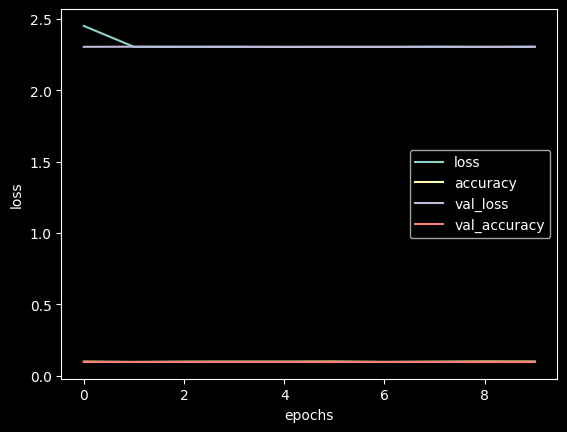

In [120]:
pd.DataFrame(non_norm_history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Text(0.5, 0, 'epochs')

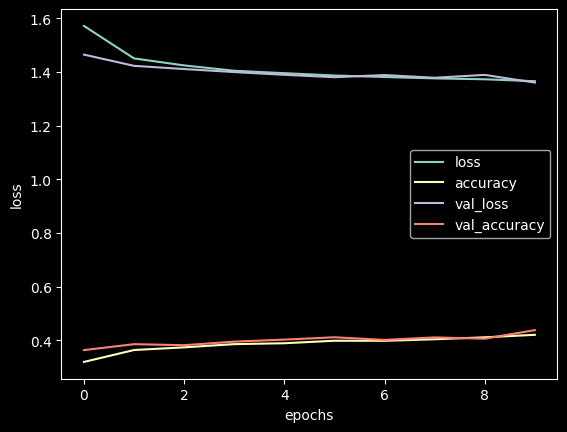

In [121]:
pd.DataFrame(non_norm_history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

🔑 **NOTE** - Neural networks prefer data in scaled/normalized form i.e. between 0 and 1